# Preprocessing postsynaptic currents for analysis of short term synaptic plasticity
### Marco Arieli Herrera-Valdez
### Recordings from Mario Alberto Arias

__Created: MAHV20160430__ 

__Last modified: MAHV20160516__ 

Data was first extracted from csv files. Each file contains 11 traces containing postsynaptic responses of striatal neurons to stimulation trains applied in cortical and thalamic afferents to the striatum.



In [1]:
from stspPreProcessing import *
%matplotlib inline

Functions created for the preprocessing and smoothing the data can be found in stspPreProcessing.py

Read files and store them into a list. Each item of the list is a dictionary containing data and other information like the file name and the sampling frequency. 

In [22]:
# ----------------------------------
# Reading files
# ----------------------------------
# CTX-FS
fNames= getFileList(srcDir, "CTX-FS", "-I.csv")
ctxFS= getSamplesFromList(fNames)
print(ctxFS[0].keys())

Found 9 files with the indicated string
['./STP_Cortico-Str_Talamo-Str/CTX-FS_M590_N-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M592_I-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M593_F-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M594_F-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M602_D-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M701_H-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M717_E-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M719_E-I.csv', './STP_Cortico-Str_Talamo-Str/CTX-FS_M721_C-I.csv']
./STP_Cortico-Str_Talamo-Str/CTX-FS_M590_N-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M592_I-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M593_F-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M594_F-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M602_D-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M701_H-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M717_E-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M719_E-I.csv
./STP_Cortico-Str_Talamo-Str/CTX-FS_M721_C-I.csv
dict_keys(['sampTimes', 'header', 'recordings', 'H

The stimulus times were found by exploration of the time series. From visual inspection, it is assumed that the stimulus artifact lasts 5 milliseconds. The stimulus trains were applied at 20 Hz in trains of ten pulses each. 

In [23]:
# Relevant parameters
stimulusTimes= sc.arange(0.15, 0.65, 0.05)
stimArtEnds=stimulusTimes + 0.005 
stimulusEnds= stimulusTimes + 0.05

### Smoothing the data

Signals were filtered using Fourier transforms, low-passed, and then converted back to the time domain.

The function used to filter the signals is

In [24]:
# FFT low-high cut
def lowFreqSmoothing(x,lowCut=400,hiCut=600):
	rft= sc.fftpack.rfft(x); 
	rft[:lowCut]=0; 
	rft[hiCut:]=0; 
	#y_smooth = sc.ifft(rft, N)
	y=sc.fftpack.irfft(rft); 
	return y #,y_smooth

Extract one trace from the data and check the parameters for filtering. 

In [32]:
# Smoothing signals. 
fileNum=7
recI = ctxFS[7]
trace= 4
low=0; hi=1000
dt =1.0/recV["Hz"]
nPts = 0.05/dt
x=recI["recordings"][trace];
xt= sc.arange(0,len(x)*dt, dt);
x_smooth=lowFreqSmoothing(x,lowCut=low,hiCut=hi)
pieces,pieceTimes=splitTrace(recI["sampTimes"], x,stimArtEnds,nPts)
sm_pieces,sPieceTimes=splitTrace(recI["sampTimes"], x_smooth, stimArtEnds,nPts)

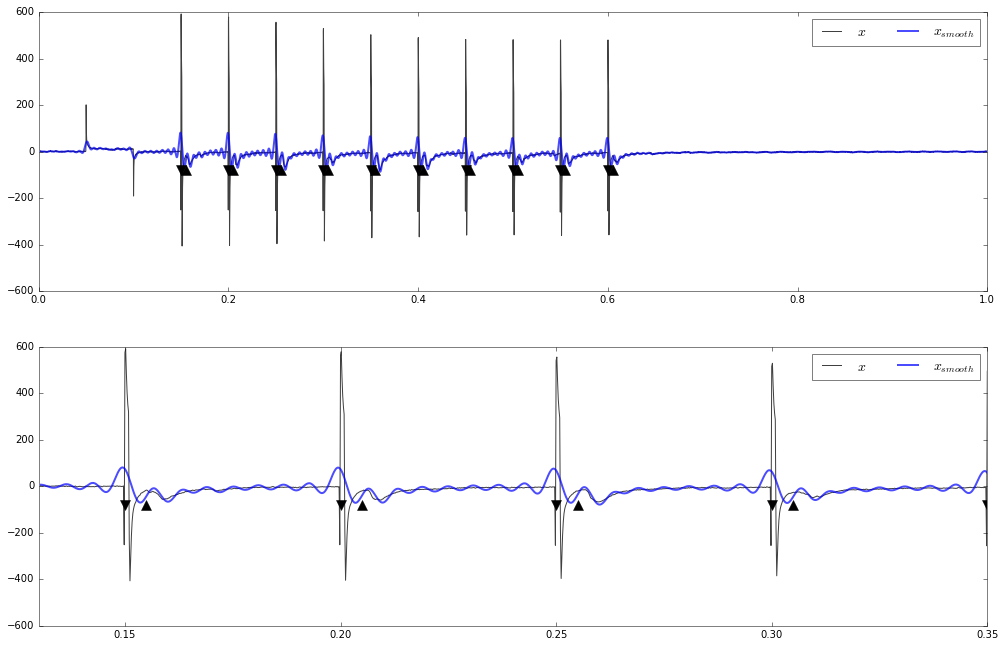

In [33]:
fig1=gr.figure(figsize=(17,11)); gr.ioff()
str0=r"l=%g,h=%g"%(low,hi)
fig1.canvas.set_window_title(str0)
ax = list()
cols=1;rows=2
ax.append(fig1.add_subplot(rows,cols,1))
ax.append(fig1.add_subplot(rows,cols,2))
for n in [0,1]:
	ax[n].plot(xt,x, "k", lw=1, alpha=0.75, label=r"$x$")
	ax[n].plot(xt,x_smooth,"b", lw=2, alpha=0.7, label=r"$x_{smooth}$")
	ax[n].set_xlim(0,1)
	ax[n].plot(stimulusTimes, -79.5*sc.ones(len(stimulusTimes)), "kv", ms=10)
	ax[n].plot(stimArtEnds, -81.5*sc.ones(len(stimArtEnds)), "k^",ms=10)
	ax[n].legend(fontsize=14,ncol=2)
ax[1].set_xlim(0.13,.35)
gr.ion(); gr.draw()


Now explore the responses to the stimulus and look for signs of STSP

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel-4.3.1-py3.5.egg/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


I_n/I_1= [ 1.          1.12274993  0.84320266  1.24252872  1.0877978   0.80479673
  0.79214364  0.89806598  0.77962781]


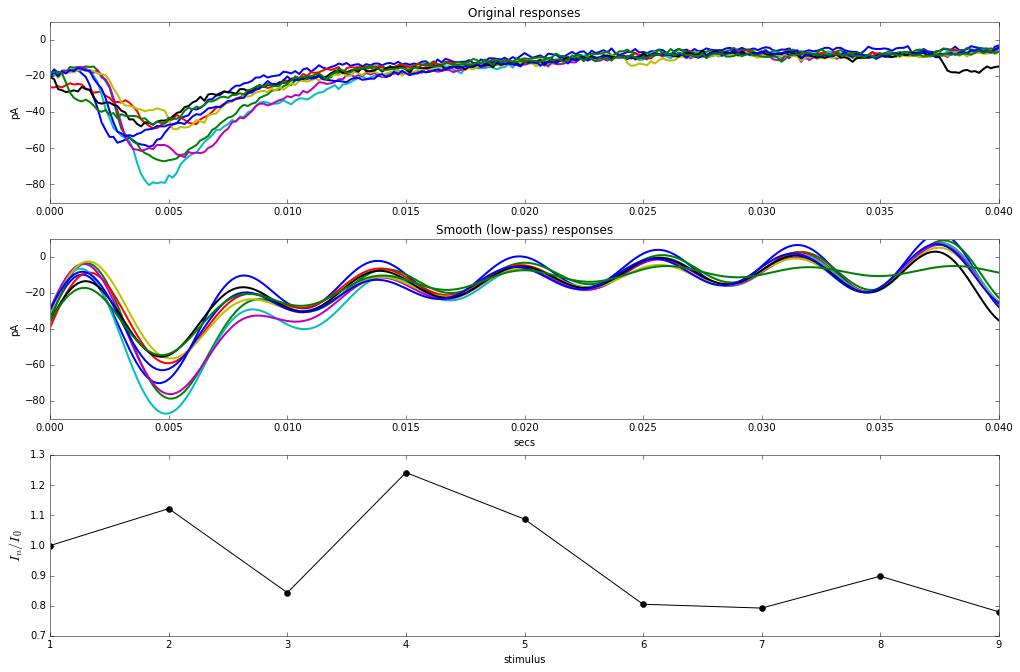

In [36]:
fig2=gr.figure(figsize=(17,11)); gr.ioff()
str0=r"l=%g,h=%g"%(low,hi)
fig2.canvas.set_window_title(str0)
ax = list()
cols=1;rows=3
ax.append(fig2.add_subplot(rows,cols,1))
ax.append(fig2.add_subplot(rows,cols,2))
ax.append(fig2.add_subplot(rows,cols,3))
M = sc.zeros(len(pieces)-1)
for nn in sc.arange(1,len(pieces)):
	ti = sc.arange(0,len(pieces[nn])*dt,dt)
	#print(len(pieces[nn]))
	M[nn-1]= sc.absolute(sm_pieces[nn][:nPts/2]).max()
	ax[0].plot(ti,pieces[nn], lw=2, alpha=1, label=r"$x$")
	ax[1].plot(ti,sm_pieces[nn], lw=2, alpha=1, label=r"$x_{smooth}$")
ax[0].set_xlim(0,0.04); ax[0].set_ylim(-90,10); 
ax[1].set_xlim(0,0.04); ax[1].set_ylim(-90,10); 
ax[0].set_ylabel("pA"); #ax[0].set_xlabel("secs"); 
ax[0].set_title("Original responses")
ax[1].set_ylabel("pA"); ax[1].set_xlabel("secs"); ax[1].set_title("Smooth (low-pass) responses")
ax[2].set_ylabel("$I_n/I_0$",fontsize=14)
ax[2].set_xlabel("stimulus")
ax[2].plot(sc.arange(1,len(M)+1),M/M[0],'ko')
ax[2].plot(sc.arange(1,len(M)+1),M/M[0],'k')
print("I_n/I_1=",M/M[0])
gr.ion(); gr.draw()